# Is dog size/intelligence linked?
### [Table of Contents](#toc) <a class="anchor" id="toc"></a>
- [Goals](#goals)
- [Data](#data)
    - [Loading the Data](#data_1)
    - [Data Information](#data_2)
- [Data Cleaning](#data_cleaning)
- [Exploratory Data Analysis](#eda)
    - [Big Picture](#big_pic)
    - [Relationship](#relationship)
- [Conclusion](#conclusion)

### Goals <a class="anchor" id="Goals"></a>
This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis data set of dog breed, size and intelligence, also to find the relationship between those variables.

### Data <a class="anchor" id="data"></a>
The data for this project was downloaded from Kaggle:

https://www.kaggle.com/datasets/thedevastator/canine-intelligence-and-size

Information regarding the features for the data are located in the Column section on the website.


##### Import Python Modules
First, import the primary modules that will be used in this project:

In [276]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### Loading the Data <a class="anchor" id="data_1"></a>
To analyze the data, load the datasets into DataFrames.<br>

*dog_intelligence.csv* contain the data as follows:
- Breed	- The breed of the dog. (String)
- Classification - The size classification of the dog according to the American Kennel Club. (String)
- obey - The probability that the breed obeys the first command. (Float)
- reps_lower - The lower limit of repetitions to understand new commands. (Integer)
- reps_upper - The upper limit of repetitions to understand new commands. (Integer)

*AKC Breed Info.csv* contain the data as follows:
- Breed - The breed of the dog. (String)
- height_low_inches - The lower range of the height of the dog in inches. (Integer)
- height_high_inches - The upper range of the height of the dog in inches. (Integer)
- weight_low_lbs - The lower range of the weight of the dog in pounds. (Integer)
- weight_high_lbs - The upper range of the weight of the dog in pounds. (Integer)

In [277]:
dog_intelligence = pd.read_csv('dog_intelligence.csv')
dog_intelligence.head()

,index,Breed,Classification,obey,reps_lower,reps_upper
0,0,Border Collie,Brightest Dogs,95%,1,4
1,1,Poodle,Brightest Dogs,95%,1,4
2,2,German Shepherd,Brightest Dogs,95%,1,4
3,3,Golden Retriever,Brightest Dogs,95%,1,4
4,4,Doberman Pinscher,Brightest Dogs,95%,1,4


In [278]:
dog_intelligence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           136 non-null    int64 
 1   Breed           136 non-null    object
 2   Classification  136 non-null    object
 3   obey            125 non-null    object
 4   reps_lower      136 non-null    int64 
 5   reps_upper      136 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 6.5+ KB


In [279]:
dog_intelligence.isnull().sum()

index              0
Breed              0
Classification     0
obey              11
reps_lower         0
reps_upper         0
dtype: int64

In [280]:
dog_breed = pd.read_csv('AKC Breed Info.csv')
dog_breed.head()

,index,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,0,Akita,26,28,80,120
1,1,Anatolian Sheepdog,27,29,100,150
2,2,Bernese Mountain Dog,23,27,85,110
3,3,Bloodhound,24,26,80,120
4,4,Borzoi,26,28,70,100


In [281]:
dog_breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               150 non-null    int64 
 1   Breed               150 non-null    object
 2   height_low_inches   150 non-null    object
 3   height_high_inches  150 non-null    object
 4   weight_low_lbs      150 non-null    object
 5   weight_high_lbs     150 non-null    object
dtypes: int64(1), object(5)
memory usage: 7.2+ KB


In [282]:
dog_breed.isnull().sum()

index                 0
Breed                 0
height_low_inches     0
height_high_inches    0
weight_low_lbs        0
weight_high_lbs       0
dtype: int64

#### Data Information <a class="anchor" id="data_2"></a>
Some insights are:

*dog_intelligence*:
- There are 6 columns and 136 rows
- obey column has missing data, some cleaning will be necessary for this column prior to conducting EDA.

*dog_breed*:
- There are 6 columns and 150 rows. Since we will focus on analyze dog intelligence, merging with *dog_intelligence* will cut off some rows in *dog_breed*. 


### Data Cleaning <a class="anchor" id="data_cleaning"></a>
*dog_intelligence:*
- Create new column for average number of repetitions to understand new commands. (Integer)
- Drop row with null value.
- Set the value of obey as floats

*dog_breed:*
- Drop row with null value (also row that record 'na' and 'not found').
- Set the values of height(high/low), weight(high/low) as floats.
- Create 2 new columns for average height and average weight for each breed.

*data:*
- Merge 2 data (dog_intelligence and dog_breed) together using left merge on dog_breed matching data in Breed column. Then drop the Null value.
Note: Since some of the data in dog_intelligence contain widely define dog breed (e.g. Poodle) but data in dog_breed has multiple records of more specific breed (e.g. Poodle Standard, Poodle Miniature and Poodle Toy). Including those data will result in bais on analyze the relationship between dog size and dog intelligence because the same dog breed (Poodle) with one set of intelligence value will math to multiple dog size (Poodle Standard, Poodle Miniature and Poodle Toy). Merging only exact indentical breed can eliminate the bias result.

In [283]:
# dog_intelligence
# create new column
dog_intelligence['reps_avg'] = (dog_intelligence.reps_lower+dog_intelligence.reps_upper)/2

# drop rows with null value
dog_intelligence.dropna(inplace=True)

# set value as float
dog_intelligence['obey'] = dog_intelligence['obey'].str.replace('%','').astype(float)

dog_intelligence.head()

,index,Breed,Classification,obey,reps_lower,reps_upper,reps_avg
0,0,Border Collie,Brightest Dogs,95.0,1,4,2.5
1,1,Poodle,Brightest Dogs,95.0,1,4,2.5
2,2,German Shepherd,Brightest Dogs,95.0,1,4,2.5
3,3,Golden Retriever,Brightest Dogs,95.0,1,4,2.5
4,4,Doberman Pinscher,Brightest Dogs,95.0,1,4,2.5


In [284]:
# dog_breed
# Drop row with null value.
cols_dropna = ['height_low_inches','height_high_inches','weight_low_lbs', 'weight_high_lbs']
for col in cols_dropna:
    dog_breed = dog_breed[pd.to_numeric(dog_breed[col], errors='coerce').notnull()]
    
# set value as float
dog_breed['height_low_inches'] = dog_breed['height_low_inches'].astype(float)
dog_breed['height_high_inches'] = dog_breed['height_high_inches'].astype(float)
dog_breed['weight_low_lbs'] = dog_breed['weight_low_lbs'].astype(float)
dog_breed['weight_high_lbs'] = dog_breed['weight_high_lbs'].astype(float)
dog_breed['weight_high_lbs'] = dog_breed['weight_high_lbs'].astype(float)

# create average column
dog_breed['height_avg'] = (dog_breed['height_low_inches']+dog_breed['height_high_inches'])/2
dog_breed['weight_avg'] = (dog_breed['weight_low_lbs']+dog_breed['weight_high_lbs'])/2
dog_breed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 149
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               148 non-null    int64  
 1   Breed               148 non-null    object 
 2   height_low_inches   148 non-null    float64
 3   height_high_inches  148 non-null    float64
 4   weight_low_lbs      148 non-null    float64
 5   weight_high_lbs     148 non-null    float64
 6   height_avg          148 non-null    float64
 7   weight_avg          148 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.4+ KB


In [285]:
# merge 2 data set
merge = [dog_intelligence, dog_breed]
data = pd.merge(dog_breed, dog_intelligence,how='left', on='Breed').reset_index().dropna()
data = data.drop(labels=['index_x', 'index_y'], axis=1)
data.info()
# save data to 'data.csv' for furture use
data.to_csv('data.csv', mode='w', encoding="utf-8-sig")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 147
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               95 non-null     int64  
 1   Breed               95 non-null     object 
 2   height_low_inches   95 non-null     float64
 3   height_high_inches  95 non-null     float64
 4   weight_low_lbs      95 non-null     float64
 5   weight_high_lbs     95 non-null     float64
 6   height_avg          95 non-null     float64
 7   weight_avg          95 non-null     float64
 8   Classification      95 non-null     object 
 9   obey                95 non-null     float64
 10  reps_lower          95 non-null     float64
 11  reps_upper          95 non-null     float64
 12  reps_avg            95 non-null     float64
dtypes: float64(10), int64(1), object(2)
memory usage: 10.4+ KB


#### Checking the Classification' column <a class="anchor" id="check"></a>
There is no missing data or other issues,but notice many outliers,so it can be left as is but take caution on the further analyze.

In [286]:
data['Classification'].value_counts()

Average Working/Obedience Intelligence    33
Above Average Working Dogs                24
Fair Working/Obedience Intelligence       17
Excellent Working Dogs                    14
Brightest Dogs                             7
Name: Classification, dtype: int64

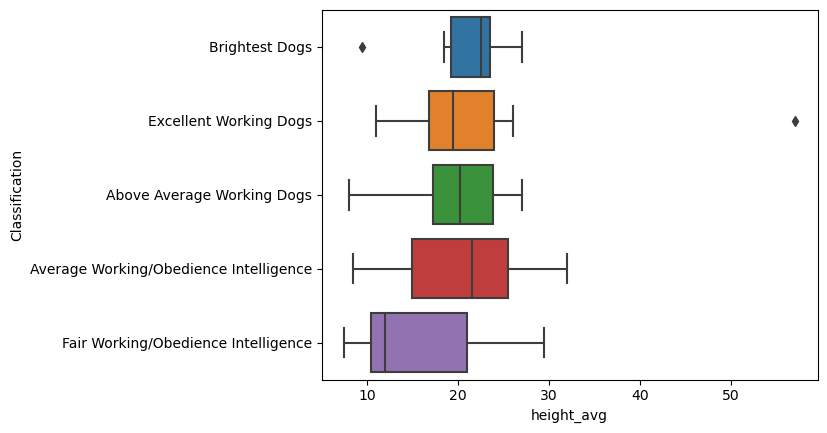

<Figure size 640x480 with 0 Axes>

In [287]:
plt.figure()
order = ['Brightest Dogs', 'Excellent Working Dogs', 'Above Average Working Dogs', 'Average Working/Obedience Intelligence', 'Fair Working/Obedience Intelligence']
x = data['Classification'].unique().tolist()
sns.boxplot(x=data['height_avg'], y = data['Classification'], order=order)
plt.show()
plt.clf()

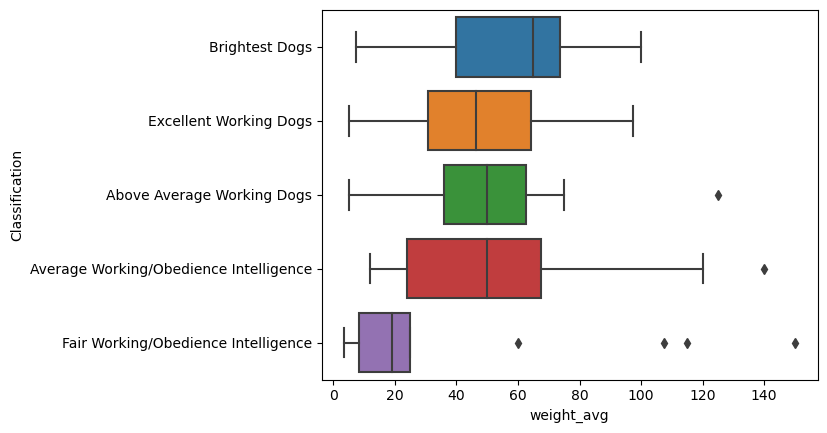

<Figure size 640x480 with 0 Axes>

In [288]:
plt.figure()
x = data['Classification'].unique().tolist()
sns.boxplot(x=data['weight_avg'], y = data['Classification'], order=order)
plt.show()
plt.clf()

### Exploratory Data Analysis <a class="anchor" id="eda"></a>
After some data cleaning and tidying, the DataFrame is ready for EDA. The following independent variables will be focused on in the analysis:

Breed
height_avg
weight_avg

The goal will be to see how these independent variables associate with the following dependent variables:
Classification
obey
reps_avg

#### Big Picture <a class="anchor" id="big_pic"></a>
##### histogram of the dataset
In order to observe the dataset as a whole, DataFrame.hist() gives a full view of all numerical variables in the distribution. The height and weight are right skewed. The obey and reps are normal distributed.

C:\Users\admin\AppData\Local\Temp\ipykernel_4752\1910972033.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax);


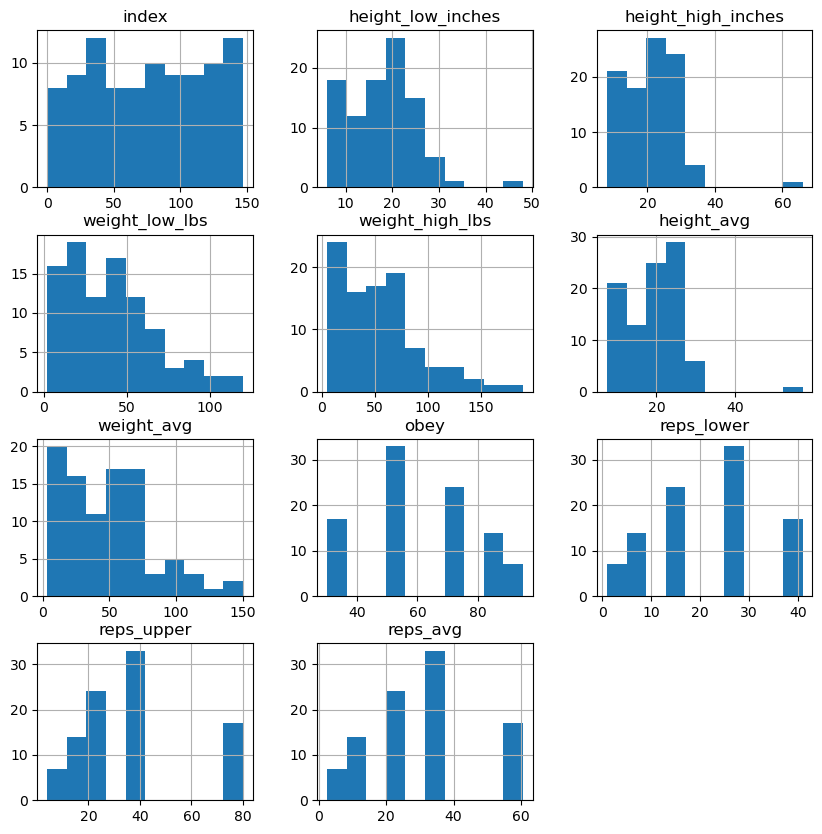

In [289]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data.hist(ax = ax);

##### Correlations and heatmap
The table of correlations and heatmap give a overview of the correlations between all numerical variables. The heat metrix shows some association between dog size (height, weight) with dog intelligence variables. Also a strong correlation between obey and reps.

In [290]:
data.corr()

,index,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,height_avg,weight_avg,obey,reps_lower,reps_upper,reps_avg
index,1.000000,-0.740892,-0.673903,-0.895406,-0.865702,-0.711320,-0.886522,-0.253447,0.265307,0.297190,0.287952
height_low_inches,-0.740892,1.000000,0.960381,0.757155,0.728713,0.988110,0.747682,0.187252,-0.204448,-0.235275,-0.225982
height_high_inches,-0.673903,0.960381,1.000000,0.673917,0.652010,0.991810,0.667496,0.212660,-0.231224,-0.248892,-0.244355
weight_low_lbs,-0.895406,0.757155,0.673917,1.000000,0.960838,0.718782,0.986546,0.123847,-0.133436,-0.157861,-0.150301
weight_high_lbs,-0.865702,0.728713,0.652010,0.960838,1.000000,0.693661,0.993214,0.092432,-0.099994,-0.125854,-0.117565
height_avg,-0.711320,0.988110,0.991810,0.718782,0.693661,1.000000,0.710898,0.203135,-0.221257,-0.245132,-0.238370
weight_avg,-0.886522,0.747682,0.667496,0.986546,0.993214,0.710898,1.000000,0.106509,-0.114994,-0.140502,-0.132438
obey,-0.253447,0.187252,0.212660,0.123847,0.092432,0.203135,0.106509,1.000000,-0.995382,-0.953939,-0.975217
reps_lower,0.265307,-0.204448,-0.231224,-0.133436,-0.099994,-0.221257,-0.114994,-0.995382,1.000000,0.969981,0.987323
reps_upper,0.297190,-0.235275,-0.248892,-0.157861,-0.125854,-0.245132,-0.140502,-0.953939,0.969981,1.000000,0.996283


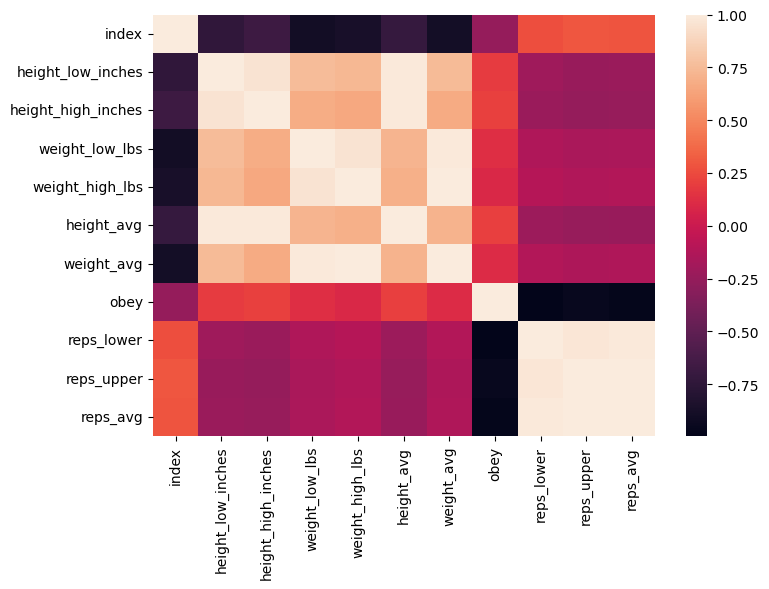

In [291]:
plt.figure(figsize=(8,6))
# heat matrix that shows correlation across all numerical variables
sns.heatmap(data=data.corr())
plt.tight_layout()
plt.show()

##### Average weight by dog intelligence classification
Another way to see the overall relationship between dog weight and classification. The 'Brightest Dogs' tends to have higher average weight compare to other classification of dog intelligence. However, to have a better detailed analyze, the correlation between each variables needed.

In [303]:
x = (data.groupby('Classification')['weight_avg'].sum()/data.Classification.value_counts()).sort_values(ascending=False)
x

Brightest Dogs                            57.142857
Average Working/Obedience Intelligence    51.575758
Above Average Working Dogs                47.666667
Excellent Working Dogs                    47.071429
Fair Working/Obedience Intelligence       36.470588
dtype: float64

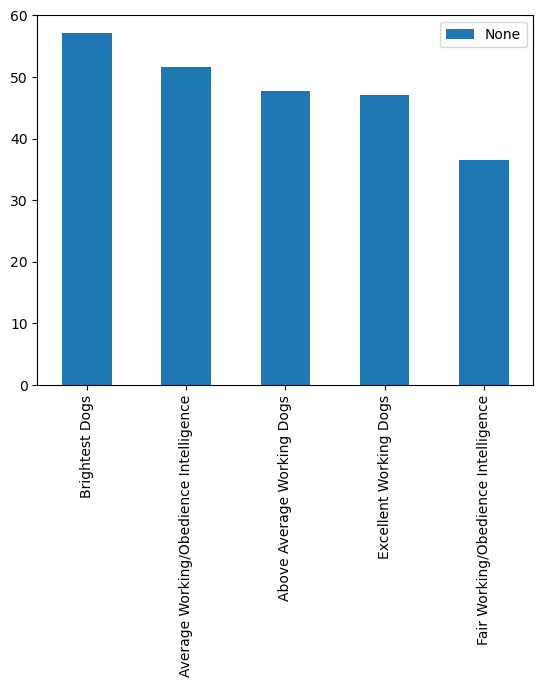

In [304]:
x.plot(kind='bar')
plt.legend(loc=1)

#### Relationship <a class="anchor" id="relationship"></a>
##### Correlations between the probability that the breed obeys the first command and dog size.
Since the correlations between the probability that the breed obeys the first command and dog size are weak (the values are approximately 0.2 or less). The line plot of obey(%) and dog size shown a possitive relationship i.e. bigger(height/weight) dogs are more likely to obeys the first command.

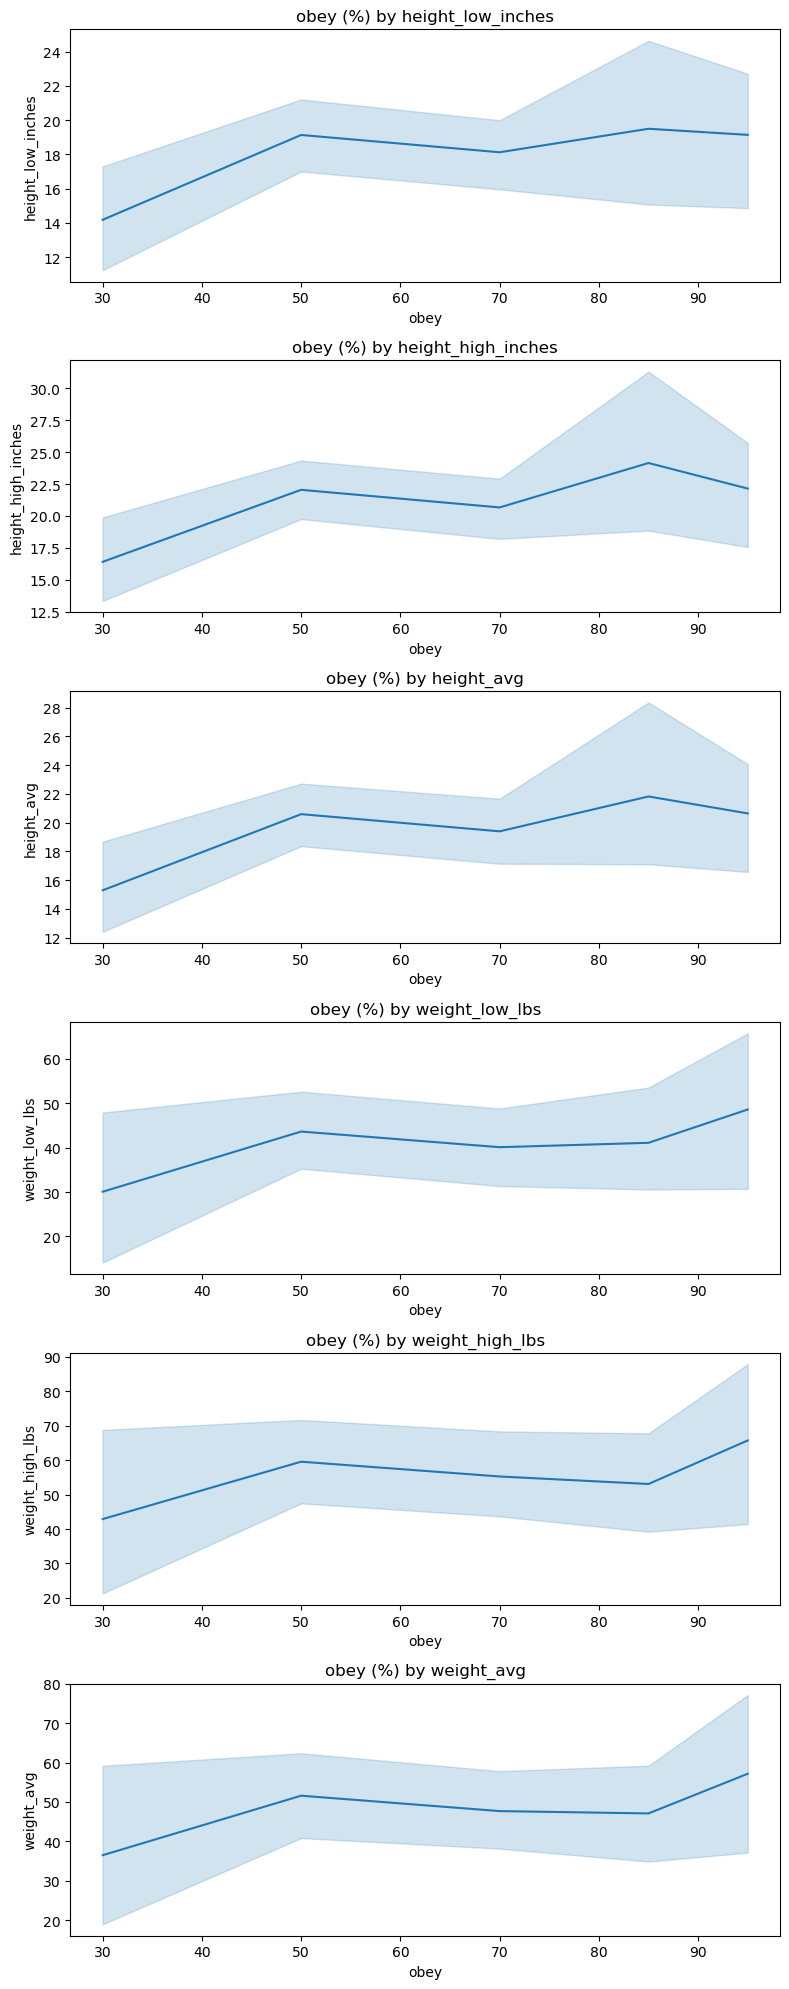

In [306]:
cols = ['height_low_inches', 'height_high_inches', 'height_avg', 'weight_low_lbs', 'weight_high_lbs', 'weight_avg']
plot = 0
fig = plt.figure(figsize=(8,20))

for i in range(len(cols)):
    plot += 1
    ax = plt.subplot(6, 1, plot)
    sns.lineplot(x=data['obey'], y=data[cols[i]])
    plt.title(f"obey (%) by {cols[i]}")
plt.tight_layout()
plt.show()

##### Correlations between the average repetitions to understand new commands and dog size.
The line plot of reps and dog size shown a negative relationship i.e. bigger(height/weight) dogs required less number of repetitions to understand new commands.

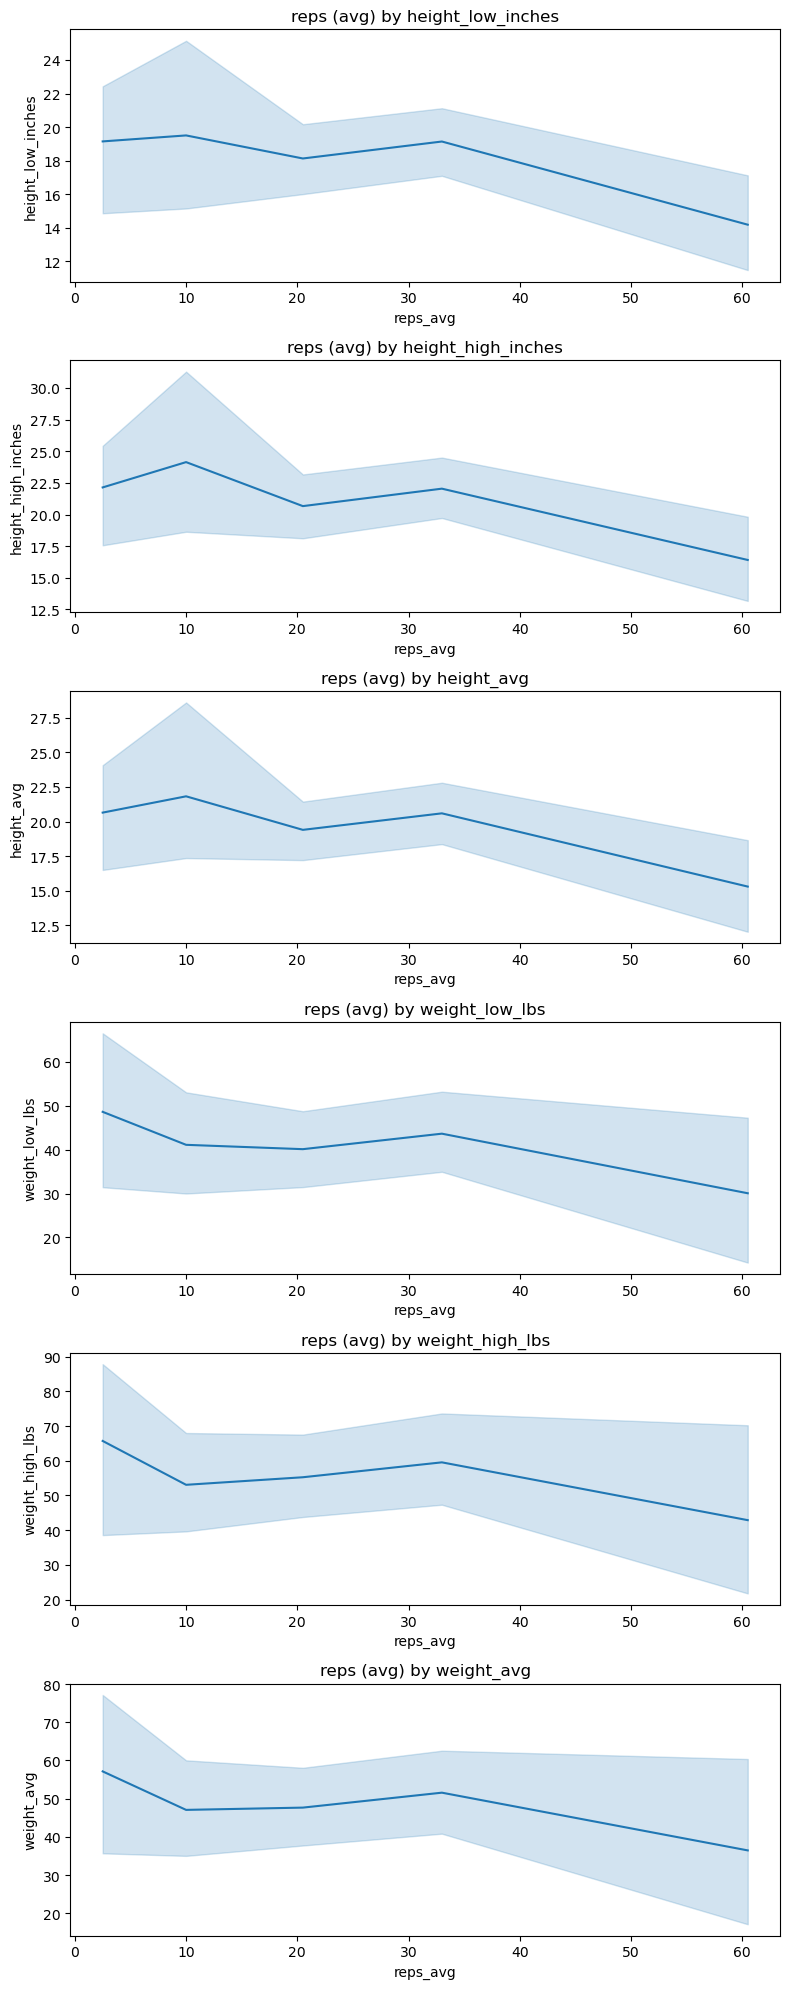

In [310]:
plot = 0
fig = plt.figure(figsize=(8,20))

for i in range(len(cols)):
    plot += 1
    ax = plt.subplot(6, 1, plot)
    sns.lineplot(x=data['reps_avg'], y=data[cols[i]])
    plt.title(f"reps (avg) by {cols[i]}")
plt.tight_layout()
plt.show()

### Conclusion <a class="anchor" id="conclusion"></a>

#### Findings Overview

The overview of the data show that there are relationship between dog size and dog intelligence. More specifically, 'The Brightest dog' seem to have higher average weight compare to other dog classification. The data show a correlation between dog size (height/weight) and dog intelligence. In detail, it has been shown that average height has stronger correlation with dog intelligence compare to average weight. In conclusion bigger(height/weight) dogs are more likely to obeys the first command and required less number of repetitions to understand new commands.


[back to top](#toc)